# Boston House Prices

This notebook demonstrates my ML modeling efforts for predicting house prices in Boston using several feature. I am personally interested in real-state value forecasting and am really excited to work on this topic, as I hope to be able to better understand some of the challenges involved in this task. 

Since the goal is to predict a continuous value (median value of owner-occupied homes in $1000s), I am going to use a regression algorithm for my modeling purpose. As the first step, I plan to use a very simple regression model, linear regression, and see what is going to be the accuracy of this model. I may try more complicated regression models too, if I observe a large error via linear regression.

There are 13 input features in this dataset, including: crime rate, average number of rooms per house, index of accessability, property tax-rate, percentage of lower status of the population, and more. Most of these features are floating point, and there are two which are integer.

Given the limited number of features, I expect to have some challenge in training a highly accurate model.

In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from numpy import arange
%matplotlib inline

## Read Data

Note that the input features for this dataset includes:

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town 

B: 1000(Bk−0.63)2, where Bk is the proportion of blacks by town 

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [63]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


## Count the number of Samples

In [64]:
print(boston.shape)

(506, 14)


## The histogram of each feature

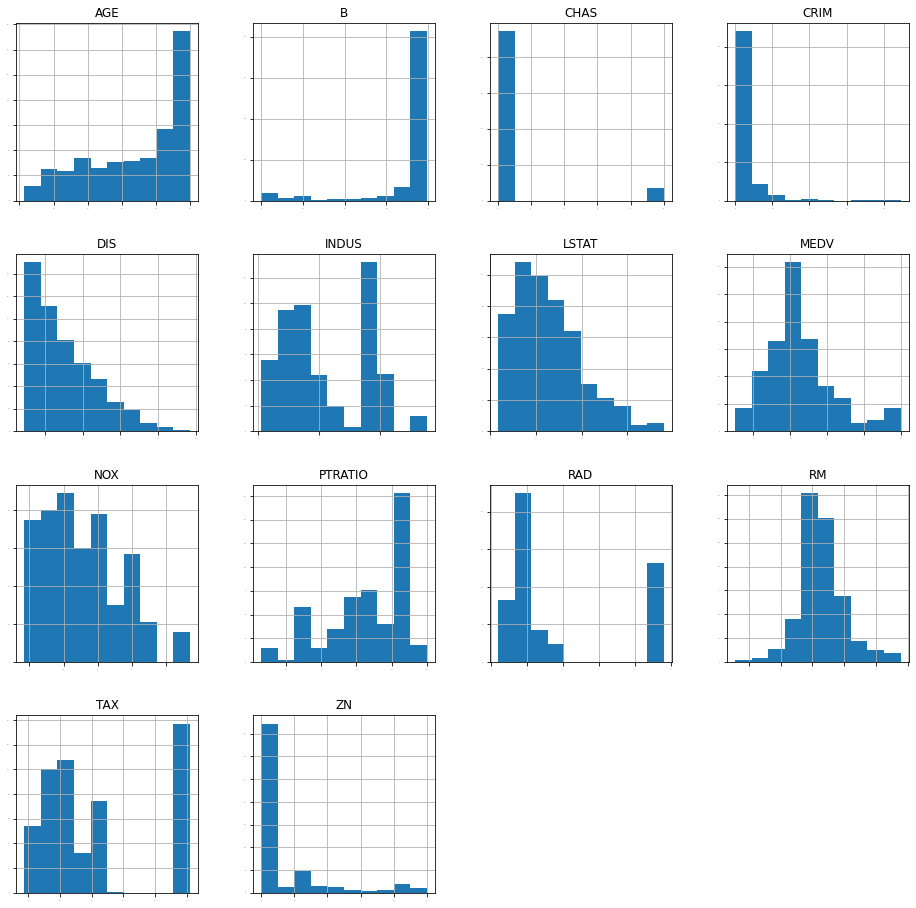

In [65]:
boston.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize = (16,16))
plt.show()

## Split Train and Test Sets

I am going to use the data_split function in sklearn to split data to train/test sets, by using 80% as training and the remaining ones as test

In [66]:
from sklearn.model_selection import train_test_split as data_split

X,Y= boston.values[:,:13], boston.values[:,13]
X_train, X_test, Y_train, Y_test = data_split(X, Y, test_size=0.2, random_state=0)

## Training/Testing Linear Regression on Raw Data

In [67]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

LinReg = linear_model.LinearRegression('normalizebool'==False)
LinReg.fit(X_train, Y_train)
house_pred_linreg = LinReg.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(Y_test, house_pred_linreg))
print("Coefficient of determination: %.2f" % r2_score(Y_test, house_pred_linreg))
print("Coefficients: \n", LinReg.coef_)

Mean squared error: 36.12
Coefficient of determination: 0.56
Coefficients: 
 [-0.11888583  0.04559146 -0.02281062  2.48645169 -0.17343239  5.98881974
 -0.01164042 -0.8429045   0.10744727 -0.00816867 -0.50445075  0.01422073
 -0.36790913]


## Training/Testing Linear Regression on Normalized Data

In [68]:
LinReg_nor = linear_model.LinearRegression('normalizebool'==True)
LinReg_nor.fit(X_train, Y_train)
house_pred_linreg_normal = LinReg_nor.predict(X_test)

print("Normalized Model Performance")
print("Mean squared error: %.2f" % mean_squared_error(Y_test, house_pred_linreg_normal))
print("Coefficient of determination: %.2f" % r2_score(Y_test, house_pred_linreg_normal))

Normalized Model Performance
Mean squared error: 36.12
Coefficient of determination: 0.56


## Regularized Linear Regression

In [69]:
RidgeReg = linear_model.Ridge(alpha= 0.1)
RidgeReg.fit(X_train, Y_train)
house_pred_Ridge = RidgeReg.predict(X_test)

print("Ridge Regression Performance")
print("Mean squared error: %.2f" % mean_squared_error(Y_test, house_pred_Ridge))
print("Coefficient of determination: %.2f" % r2_score(Y_test, house_pred_Ridge))

Ridge Regression Performance
Mean squared error: 33.55
Coefficient of determination: 0.59


## Visualizing the True Prices vs Predicted Ones

As we can see, the predicted values are pretty close to the ground-truth for most cases, and the main error happens for samples with very large value.

Text(0.5, 1.0, 'Predicted Prices Using Ridge Regression')

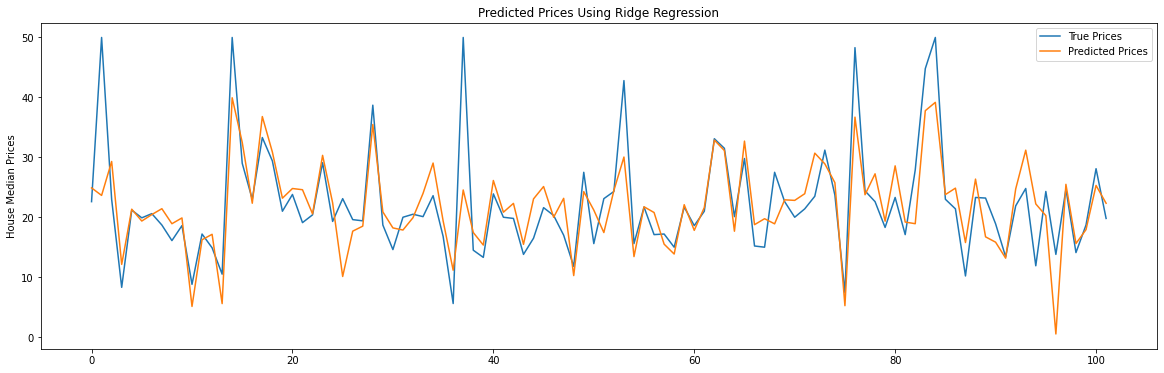

In [74]:
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(20, 6))

line1, = plt.plot(Y_test, label='True Prices')
line2, = plt.plot(house_pred_Ridge, label='Predicted Prices')
plt.legend(handles=[line1, line2], loc='upper right')
plt.ylabel('House Median Prices')
plt.title('Predicted Prices Using Ridge Regression')

## Using RandomForest Regression

I heard random forest regression performs better than linear regression for datasets with fewer features, so decided to give it a try for this dataset and see if I can get better predictions. 

After training random forest on this dataset and calculating the model's error, it seems like random forest achieved a lower error than linear regression, and ridge regression.

In [91]:
from sklearn.ensemble import RandomForestRegressor

Reg_RF = RandomForestRegressor(n_estimators= 50, max_depth= 4, random_state=0)
Reg_RF.fit(X_train, Y_train)
house_pred_RegRF = Reg_RF.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(Y_test, house_pred_RegRF))
print("Coefficient of determination: %.2f" % r2_score(Y_test, house_pred_RegRF))

Mean squared error: 19.39
Coefficient of determination: 0.76


Text(0.5, 1.0, 'Predicted Prices Using Random-Forest Regression')

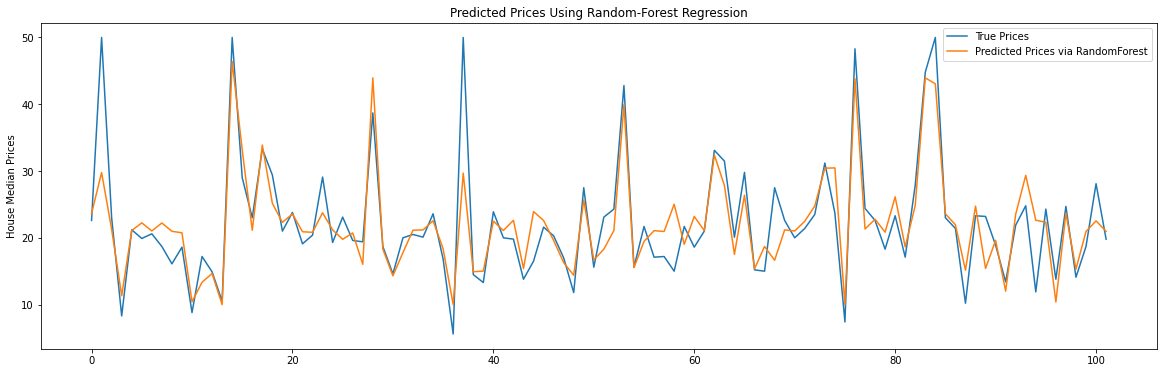

In [90]:
fig = plt.figure(figsize=(20, 6))

line1, = plt.plot(Y_test, label='True Prices')
line2, = plt.plot(house_pred_RegRF, label='Predicted Prices via RandomForest')
#line3, = plt.plot(house_pred_Ridge, label='Predicted Prices via Ridge Regression', color='k')
plt.legend(handles=[line1, line2], loc='upper right')
plt.ylabel('House Median Prices')
plt.title('Predicted Prices Using Random-Forest Regression')

## Observations

As we can see random forest model does a better job in prediting house-prices, and it predicts a more accurate values even for very large prices (for which linear regression model had problem). I guess this due to the use of various 